# Three generations seeking romance - Regression & Classification

<img src="https://kutahyaekspres.com/wp-content/uploads/2023/10/ask.jpg" width="530">

Bu bir Regresyon ve Sınıflandırma projesidir

YAŞA VE NESİLE GÖRE ÇEVRİMİÇİ BULUŞMACILARIN PROFİLİNİ ÇIKARMAK İÇİN VERİ BİLİMİ YAKLAŞIMI</br>
1 - Arkadaşlık profiliniz yaşınızı tahmin edebilir mi? Regresyon Derin Öğrenme</br>
2 - Arkadaşlık profiliniz ait olduğunuz nesli tahmin edebilir mi? (Y Kuşağı, X Kuşağı veya Bebek Patlaması Kuşağı) Sınıflandırma - Derin Öğrenme
OKCupid arkadaşlık platformundan yaklaşık 60.000 anonim girişin bulunduğu bir veri kümesini kullanarak, yukarıdaki soruları denetlenen makine öğrenme tekniklerini kullanarak keşfedeceksiniz.</br> Kullanıcı profillerinin farklı yönlerini veya özelliklerini inceleyecek ve en tatmin edici puanları elde etmek için hangilerini modellerinize entegre edeceğinizi göreceksiniz. İlk soruyu ele almak için regresyon tekniklerini ve ikinci soruyu ele almak için sınıflandırma modellerini kullanacaksınız.
“last_online” özelliğinin en düşük ve en yüksek değerlerini inceleyerek, OKCupid veri kümesinin 2011 veya 2012 civarında tarihli olduğu sonucuna varılabilir. O zamanlar, bir “Y kuşağı” 18 ila 32 yaş aralığında, bir “X kuşağı” 33 ila 47 yaş aralığında ve “Boomers” ise 48 ila 70 yaş aralığında olurdu.

<a href="https://drive.google.com/file/d/1HPMncPYf-CYgvs-KBCY2hyvqyKrwLPea/view?usp=sharing">Dataya buradan Erişebilirsiniz</a>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import normalize, scale
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.layers import Dropout, BatchNormalization

In [2]:
df=pd.read_csv("profiles.csv")

In [3]:
df.shape

(60552, 31)

In [4]:
df.isnull().sum()

age            51038
body_type      51886
diet           54791
drinks         51540
drugs          53337
education      52093
essay0         51885
essay1         52205
essay2         52503
essay3         52862
essay4         52673
essay5         52738
essay6         53200
essay7         52999
essay8         54191
essay9         52998
ethnicity      51987
height         51038
income         51038
job            52369
last_online    51038
location       51038
offspring      56666
orientation    51038
pets           54200
religion       54291
sex            51038
sign           52776
smokes         51956
speaks         51044
status         51038
dtype: int64

In [5]:
# Tüm sütunları boş olan satırları kaldırdık
df=df.dropna(how='all') 

###  EDA

In [6]:
df.head(3)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available


In [7]:
df.shape

(9514, 31)

In [8]:
df.isnull().sum()

age               0
body_type       848
diet           3753
drinks          502
drugs          2299
education      1055
essay0          847
essay1         1167
essay2         1465
essay3         1824
essay4         1635
essay5         1700
essay6         2162
essay7         1961
essay8         3153
essay9         1960
ethnicity       949
height            0
income            0
job            1331
last_online       0
location          0
offspring      5628
orientation       0
pets           3162
religion       3253
sex               0
sign           1738
smokes          918
speaks            6
status            0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9514 entries, 0 to 9513
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    8666 non-null   object 
 2   diet         5761 non-null   object 
 3   drinks       9012 non-null   object 
 4   drugs        7215 non-null   object 
 5   education    8459 non-null   object 
 6   essay0       8667 non-null   object 
 7   essay1       8347 non-null   object 
 8   essay2       8049 non-null   object 
 9   essay3       7690 non-null   object 
 10  essay4       7879 non-null   object 
 11  essay5       7814 non-null   object 
 12  essay6       7352 non-null   object 
 13  essay7       7553 non-null   object 
 14  essay8       6361 non-null   object 
 15  essay9       7554 non-null   object 
 16  ethnicity    8565 non-null   object 
 17  height       9514 non-null   float64
 18  income       9514 non-null   float64
 19  job        

In [10]:
df["smokes"].unique()

array(['sometimes', 'no', nan, 'when drinking', 'yes', 'trying to quit'],
      dtype=object)

In [11]:
df["smokes"].value_counts()

smokes
no                7011
sometimes          565
when drinking      480
yes                307
trying to quit     233
Name: count, dtype: int64

In [12]:
df["orientation"].unique()

array(['straight', 'bisexual', 'gay'], dtype=object)

In [13]:
df["orientation"].value_counts()

orientation
straight    8191
gay          897
bisexual     426
Name: count, dtype: int64

In [14]:
df["drugs"].unique()

array(['never', 'sometimes', nan, 'often'], dtype=object)

In [15]:
df["drugs"].value_counts()

drugs
never        5972
sometimes    1181
often          62
Name: count, dtype: int64

In [16]:
df["drinks"].unique()

array(['socially', 'often', 'not at all', 'rarely', nan, 'very often',
       'desperately'], dtype=object)

In [17]:
df["drinks"].value_counts()

drinks
socially       6679
rarely          911
often           809
not at all      509
very often       54
desperately      50
Name: count, dtype: int64

In [18]:
df["offspring"].unique()

array(['doesn&rsquo;t have kids, but might want them', nan,
       'doesn&rsquo;t want kids',
       'doesn&rsquo;t have kids, but wants them',
       'doesn&rsquo;t have kids', 'wants kids', 'has a kid', 'has kids',
       'doesn&rsquo;t have kids, and doesn&rsquo;t want any',
       'has kids, but doesn&rsquo;t want more',
       'has a kid, but doesn&rsquo;t want more',
       'has a kid, and wants more', 'has kids, and might want more',
       'might want kids', 'has a kid, and might want more',
       'has kids, and wants more'], dtype=object)

In [19]:
df["body_type"].unique()

array(['a little extra', 'average', 'thin', 'athletic', 'fit', nan,
       'skinny', 'curvy', 'full figured', 'jacked', 'rather not say',
       'used up', 'overweight'], dtype=object)

In [20]:
df["pets"].unique()

array(['likes dogs and likes cats', 'has cats', 'likes cats', nan,
       'has dogs and likes cats', 'likes dogs and has cats',
       'likes dogs and dislikes cats', 'has dogs',
       'has dogs and dislikes cats', 'likes dogs',
       'has dogs and has cats', 'dislikes dogs and has cats',
       'dislikes dogs and dislikes cats', 'dislikes cats',
       'dislikes dogs and likes cats', 'dislikes dogs'], dtype=object)

### Feature Engineering

In [21]:
df['smokes'] = df['smokes'].replace({ 
    'sometimes': 'yes',
    'when drinking': 'yes',
    'trying to quit': 'yes',
    })

In [22]:
df['body_type'] = df['body_type'].replace({ 
    'a little extra': 'weight',
    'average': 'fit',
    'athletic': 'fit',
    'skinny': 'thin',
    'full figured': 'weight',
    'jacked': 'fit',
    'rather not say': "fit",
    'used up': 'thin',
    'curvy': 'fit'
    })

In [23]:
df['offspring'] = df['offspring'].replace({ 
    'doesn&rsquo;t have kids': 'No',
    'doesn&rsquo;t want kids': 'No',
    'doesn&rsquo;t have kids, but wants them': 'No',
    'wants kids': 'No',
    'has a kid': 'Yes',
    'has kids': 'Yes',
    'doesn&rsquo;t have kids, and doesn&rsquo;t want any': "No",
    'has kids, but doesn&rsquo;t want more': 'Yes',
    'has a kid, but doesn&rsquo;t want more': 'Yes',
    'has a kid, and wants more': 'Yes',
    'has kids, and might want more': 'Yes',
    'might want kids': 'No',
    'has a kid, and might want more': 'Yes',
    'has kids, and wants more': 'Yes',
    'doesn&rsquo;t have kids, but might want them':"No"
    })

In [24]:
df['pets'] = df['pets'].replace({ 
    'likes dogs and likes cats': "all",
    'has cats': "cats",
    'likes cats': "cats",
    'has dogs and likes cats':"all",
    'has dogs': "dogs",
    'has dogs and dislikes cats': "cats",
    'likes dogs': "cats",
    'has dogs and has cats': "all",
    'dislikes dogs and has cats': "cats",
    'dislikes dogs and dislikes cats': "not",
    'dislikes cats': "cats",
    'dislikes dogs and likes cats':"cats",
    'dislikes dogs': "cats",
    'likes dogs and dislikes cats': "cats",
    'likes dogs and has cats':"all"
    })

In [25]:
df=df[["age","height","sex","smokes","orientation","drugs","drinks","body_type","offspring","pets"]]

In [26]:
df.isnull().sum()

age               0
height            0
sex               0
smokes          918
orientation       0
drugs          2299
drinks          502
body_type       848
offspring      5628
pets           3162
dtype: int64

In [27]:
df["smokes"]=df["smokes"].fillna("no")

In [28]:
df["drugs"]=df["drugs"].fillna("no")

In [29]:
df["drinks"]=df["drinks"].fillna("no")

In [30]:
df["body_type"]=df["body_type"].fillna("fit")

In [31]:
df["offspring"]=df["offspring"].fillna("No")

In [32]:
df["pets"]=df["pets"].fillna("not")

In [33]:
# Kuşaklandırma fonksiyonu
# Kuşakalra "Millenicom" gibi yazı şeklinde değer verirsek accuracy score çok düşük çıkıyor
def kuşak_belirle(yas):
  if 18 <= yas <= 32:
    return 1
  elif 33 <= yas <= 47:
    return 2
  elif 48 <= yas <= 70:
    return 3
  else:
    return 4

# Kuşak sütununu ekleme
df['Kusak']= df['age'].apply(kuşak_belirle)


In [34]:
df

,age,height,sex,smokes,orientation,drugs,drinks,body_type,offspring,pets,Kusak
0,22.0,75.0,m,yes,straight,never,socially,weight,No,all,1
1,35.0,70.0,m,no,straight,sometimes,often,fit,No,all,2
2,38.0,68.0,m,no,straight,no,socially,thin,No,cats,2
3,23.0,71.0,m,no,straight,no,socially,thin,No,cats,1
4,29.0,66.0,m,no,straight,never,socially,fit,No,all,1
...,...,...,...,...,...,...,...,...,...,...,...
9509,28.0,73.0,m,no,straight,never,socially,fit,No,all,1
9510,31.0,72.0,m,yes,gay,sometimes,socially,fit,No,not,1
9511,34.0,71.0,m,yes,gay,no,socially,fit,No,all,2
9512,29.0,70.0,m,no,gay,never,rarely,fit,No,all,1


### Modelling

#### Regression ile Yaş Tahmini

In [35]:
x = df.drop("age", axis=1)

In [36]:
y=df["age"]

In [37]:
x=pd.get_dummies(x)

In [38]:
x

,height,Kusak,sex_f,sex_m,smokes_no,smokes_yes,orientation_bisexual,orientation_gay,orientation_straight,drugs_never,...,body_type_fit,body_type_overweight,body_type_thin,body_type_weight,offspring_No,offspring_Yes,pets_all,pets_cats,pets_dogs,pets_not
0,75.0,1,False,True,False,True,False,False,True,True,...,False,False,False,True,True,False,True,False,False,False
1,70.0,2,False,True,True,False,False,False,True,False,...,True,False,False,False,True,False,True,False,False,False
2,68.0,2,False,True,True,False,False,False,True,False,...,False,False,True,False,True,False,False,True,False,False
3,71.0,1,False,True,True,False,False,False,True,False,...,False,False,True,False,True,False,False,True,False,False
4,66.0,1,False,True,True,False,False,False,True,True,...,True,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9509,73.0,1,False,True,True,False,False,False,True,True,...,True,False,False,False,True,False,True,False,False,False
9510,72.0,1,False,True,False,True,False,True,False,False,...,True,False,False,False,True,False,False,False,False,True
9511,71.0,2,False,True,False,True,False,True,False,False,...,True,False,False,False,True,False,True,False,False,False
9512,70.0,1,False,True,True,False,False,True,False,True,...,True,False,False,False,True,False,True,False,False,False


In [39]:
x=scale(x)

In [40]:
x

array([[ 1.70616204, -0.69686557, -0.82248147, ..., -0.5206491 ,
        -0.27810283, -0.71257663],
       [ 0.42575994,  0.87645646, -0.82248147, ..., -0.5206491 ,
        -0.27810283, -0.71257663],
       [-0.0864009 ,  0.87645646, -0.82248147, ...,  1.9206794 ,
        -0.27810283, -0.71257663],
       ...,
       [ 0.68184036,  0.87645646, -0.82248147, ..., -0.5206491 ,
        -0.27810283, -0.71257663],
       [ 0.42575994, -0.69686557, -0.82248147, ..., -0.5206491 ,
        -0.27810283, -0.71257663],
       [-1.11072258,  2.4497785 ,  1.21583286, ..., -0.5206491 ,
        -0.27810283, -0.71257663]])

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [42]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,0.844722,3.756651,3.071571
KNeighborsRegressor,0.839510,3.819184,3.150264
mlp_regressor,0.834490,3.878447,3.168782
XGBRegressor,0.832753,3.898751,3.172759
Ridge,0.830508,3.924827,3.174840
Linear,0.830366,3.926469,3.175538
SGD,0.829798,3.933036,3.178458
Lasso,0.810262,4.152624,3.253018
SVR,0.774600,4.526088,3.429478
Extra Tree,0.739850,4.862483,3.797376


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20, random_state=42)

In [44]:
model=Sequential()
model.add(Dense(240,activation="relu"))
model.add(Dense(196,activation="relu")) 
model.add(BatchNormalization())
model.add(Dense(144,activation="relu")) 
model.add(Dense(96,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(.25))
model.add(Dense(32,activation="relu")) 
model.add(Dense(16,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(8,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1)) 
model.compile(loss="mse", optimizer="adam") 

In [45]:
history=model.fit(x_train,y_train ,validation_data=(x_test,y_test), batch_size=128, epochs=300)

Epoch 1/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 1100.9257 - val_loss: 1092.1658
Epoch 2/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1015.3170 - val_loss: 935.8279
Epoch 3/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 828.1753 - val_loss: 598.2991
Epoch 4/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 457.9613 - val_loss: 196.5508
Epoch 5/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 158.7613 - val_loss: 82.9201
Epoch 6/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37.3336 - val_loss: 55.7796
Epoch 7/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.8819 - val_loss: 38.6580
Epoch 8/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22.4894 - val_loss: 17.5640
Epoch 9/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.3554 - val_loss: 19.3309
Epoch 10/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.9269 - val_loss: 17.4019
Epoch 11/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.2187 - val_loss: 16.5696
Epoch 12/300
60/60 ━━━━━━━━━━

In [46]:
tahmin=model.predict(x_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [47]:
mean_squared_error(tahmin,y_test)**.5

4.299139198529712

In [48]:
r2_score(tahmin,y_test)

0.7304921353124149

In [49]:
loss_f=pd.DataFrame(history.history)

<Axes: >

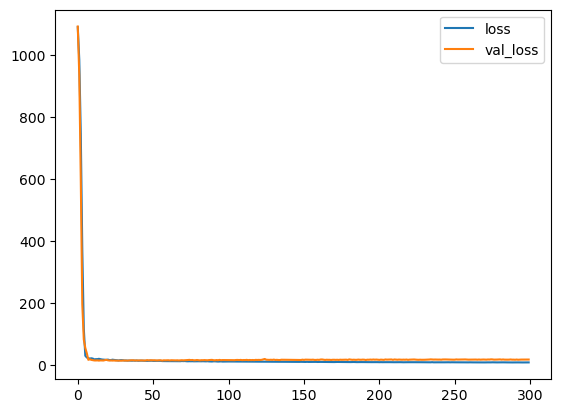

In [50]:
loss_f.plot()

!Regression da kuşakları vermeyince yaş tahmini scoru eksilerde çıkyor

#### Classification ile Kuşak tahmini

In [51]:
df

,age,height,sex,smokes,orientation,drugs,drinks,body_type,offspring,pets,Kusak
0,22.0,75.0,m,yes,straight,never,socially,weight,No,all,1
1,35.0,70.0,m,no,straight,sometimes,often,fit,No,all,2
2,38.0,68.0,m,no,straight,no,socially,thin,No,cats,2
3,23.0,71.0,m,no,straight,no,socially,thin,No,cats,1
4,29.0,66.0,m,no,straight,never,socially,fit,No,all,1
...,...,...,...,...,...,...,...,...,...,...,...
9509,28.0,73.0,m,no,straight,never,socially,fit,No,all,1
9510,31.0,72.0,m,yes,gay,sometimes,socially,fit,No,not,1
9511,34.0,71.0,m,yes,gay,no,socially,fit,No,all,2
9512,29.0,70.0,m,no,gay,never,rarely,fit,No,all,1


In [52]:
x=df.drop("Kusak",axis=1)
y=df["Kusak"]

In [53]:
y

0       1
1       2
2       2
3       1
4       1
       ..
9509    1
9510    1
9511    2
9512    1
9513    3
Name: Kusak, Length: 9514, dtype: int64

In [54]:
x

,age,height,sex,smokes,orientation,drugs,drinks,body_type,offspring,pets
0,22.0,75.0,m,yes,straight,never,socially,weight,No,all
1,35.0,70.0,m,no,straight,sometimes,often,fit,No,all
2,38.0,68.0,m,no,straight,no,socially,thin,No,cats
3,23.0,71.0,m,no,straight,no,socially,thin,No,cats
4,29.0,66.0,m,no,straight,never,socially,fit,No,all
...,...,...,...,...,...,...,...,...,...,...
9509,28.0,73.0,m,no,straight,never,socially,fit,No,all
9510,31.0,72.0,m,yes,gay,sometimes,socially,fit,No,not
9511,34.0,71.0,m,yes,gay,no,socially,fit,No,all
9512,29.0,70.0,m,no,gay,never,rarely,fit,No,all


In [55]:
x=pd.get_dummies(x)

In [56]:
x=scale(x)

In [57]:
# label_encoder = LabelEncoder()
# y= label_encoder.fit_transform(y)

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20, random_state=42)

In [59]:
y_train

7563    1
6125    2
1941    1
4750    1
3315    1
       ..
5734    2
5191    1
5390    3
860     2
7270    2
Name: Kusak, Length: 7611, dtype: int64

In [60]:
model=Sequential()
model.add(Dense(240,activation="relu")) 
model.add(Dense(196,activation="relu")) 
model.add(Dense(144,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(112,activation="relu"))
model.add(Dense(96,activation="relu"))
model.add(Dense(72,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(60,activation="relu"))
model.add(Dense(48,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(18,activation="relu"))
model.add(Dense(6,activation="relu"))
model.add(Dense(1,activation="sigmoid")) 
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])

In [61]:
history=model.fit(x_train,y_train,epochs=300,batch_size=18, validation_split=.20, verbose=1) 

Epoch 1/300
339/339 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5403 - loss: -16.4074 - val_accuracy: 0.6277 - val_loss: -715.4804
Epoch 2/300
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6418 - loss: -1176.2195 - val_accuracy: 0.6277 - val_loss: -10857.3018
Epoch 3/300
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6297 - loss: -11005.8174 - val_accuracy: 0.6277 - val_loss: -35201.0625
Epoch 4/300
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6295 - loss: -44853.1719 - val_accuracy: 0.6277 - val_loss: -98721.5156
Epoch 5/300
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6271 - loss: -121924.3672 - val_accuracy: 0.6277 - val_loss: -289016.9688
Epoch 6/300
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6409 - loss: -254486.5156 - val_accuracy: 0.6277 - val_loss: -440343.5312
Epoch 7/300
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6449 - loss: -470689.5312 - val_accuracy: 0.6277 - val_loss: -737345.7500
Epoch 8/300
339/339 ━━━━━━━

In [62]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 240)                 │           7,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 196)                 │          47,236 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 144)                 │          28,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 144)                 │             576 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 112)                 │          16,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 96)                  │          10,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 72)                  │           6,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 72)                  │             288 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 60)                  │           4,380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 48)                  │           2,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 18)                  │             594 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 6)                   │             114 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 382,107 (1.46 MB)

 Trainable params: 127,203 (496.89 KB)

 Non-trainable params: 496 (1.94 KB)

 Optimizer params: 254,408 (993.79 KB)

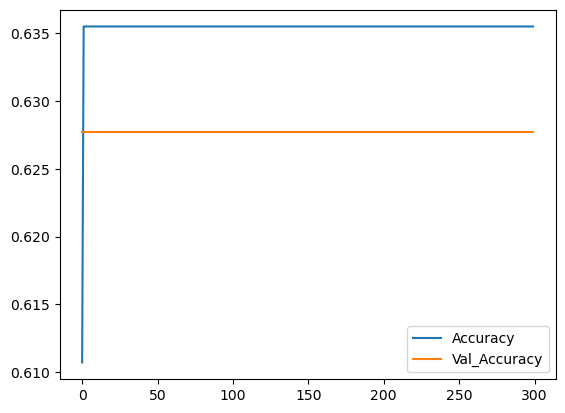

In [63]:
plt.plot(history.history["accuracy"],label="Accuracy")         #Eğitim kümesinin dogrulugu
plt.plot(history.history["val_accuracy"],label="Val_Accuracy") # Dogrulama kümesinin dogrulugu
plt.legend()

Classification da "y" deki kuşakları yazı şeklinde girip label encoder yapınca accuracy score çok düşük çıkıyor 
; Ancak kuşakalra en başta 1,2,3 şeklinde değer verince accuradcy score normal değerlerde çıkıyor